In [1]:
%matplotlib widget

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

from comp_inhib_wc import dxdt_v2, jacobian, sim_dev, plot_sim_dev

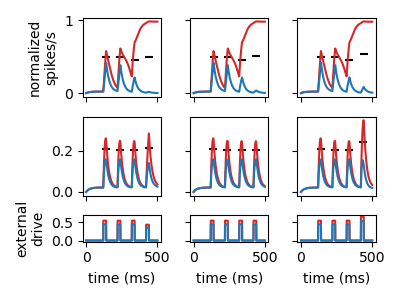

In [9]:
# for final figures!!!!

dev = 0.2  # change in proportion of original injected excitation

w_ii, w_ij, w_ii_l2, w_ij_l2, w_fb = [1., -0.33840608, 0.2270948, -0.2, -1.]

tau = 20
tau_2 = 20
thresh = 0.5
thresh_2 = 0.5
steepness = 8
steepness_2 = 15

# setup figure
gridspec = {'width_ratios': [1, 1, 1], 'height_ratios': [3, 3, 1]}
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                         gridspec_kw=gridspec, figsize=(4, 3))

# -DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2,)
x_negdev_noL6 = x.copy()
plot_sim_dev(times, x[:, :2], axes[0, 0])  # only plot first subgroup

# 0 DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 1])  # only plot first subgroup

# +DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 2])  # only plot first subgroup

# -DEV; with L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
x_negdev_L6 = x.copy()
plot_sim_dev(times, x[:, :2], axes[1, 0])  # now plot both subgroups
# plot time course for injected excitation
colors = ['tab:red', 'tab:blue']
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 0].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# 0 DEV; with L6
times, x, inj_excite, w = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 1])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 1].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# +DEV; with L6
times, x, inj_excite, w = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 2])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 2].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

axes[0, 0].set_ylabel('normalized\nspikes/s')
axes[2, 0].set_ylabel('external\ndrive')
axes[2, 0].set_xlabel('time (ms)')
axes[2, 1].set_xlabel('time (ms)')
axes[2, 2].set_xlabel('time (ms)')
fig.tight_layout()
plt.show()

In [ ]:
# fig.savefig('simple_model_example_detailed.pdf')

In [ ]:
inhib = -1 * (x @ (w * (np.ones_like(w) - np.eye(w.shape[0]))))

inhib_red = inhib[:, 0]
inhib_blue = inhib[:, 0]

colors = ['tab:red', 'tab:blue']
fig, axes = plt.subplots(1, 2, figsize=(6, 6))
axes[0].plot(times, inhib[:, 0], color=colors[0])
axes[0].plot(times, inhib[:, 1], color=colors[1])
axes[1].plot(inhib[:, 1], inhib[:, 0])
plt.show()

In [6]:
# find fixed points
I = 0.01 * np.ones((4,))
thresh = 0.5
thresh_2 = 0.5
steepness = 8
steepness_2 = 15

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol = optimize.root(func_roots, x0=[0.5, 0.5, 0.5, 0.5], method='hybr',
                    tol=1e-10, jac=True)
print(sol.x, sol.nfev, sol.message)

[0.02165743 0.02165743 0.00064235 0.00064235] 20 The solution converged.


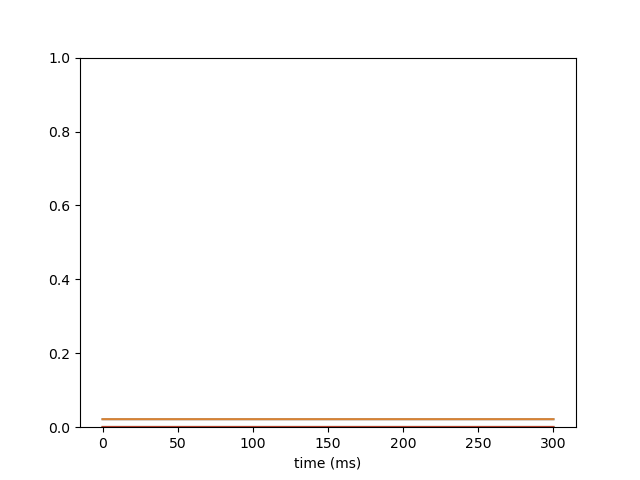

In [7]:
# sanity check: make sure state remains constant at the estimated fixed point
dt = 0.01  # ms
tstop = 300  # ms
times = np.arange(0, tstop + dt, dt)
x = np.zeros((len(times), 4))

# set initial state
x[0, :] = sol.x
# x[0, :] = [0.12165743, 0.72165743, 0.00064235, 0.00064235]

for t_idx, time in enumerate(times):
    if t_idx > 0:
        dx = dxdt_v2(x[t_idx - 1, :], w, inj_excite=I,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2) * dt
        x[t_idx, :] = x[t_idx - 1, :] + dx

# plot trajetory - it should flatline indicating the state is at a fixed point
fig, axes = plt.subplots(1, 1, sharex=True)
axes.plot(times, x, alpha=0.8)
axes.set_ylim([0, 1])
axes.set_xlabel('time (ms)')
plt.show()

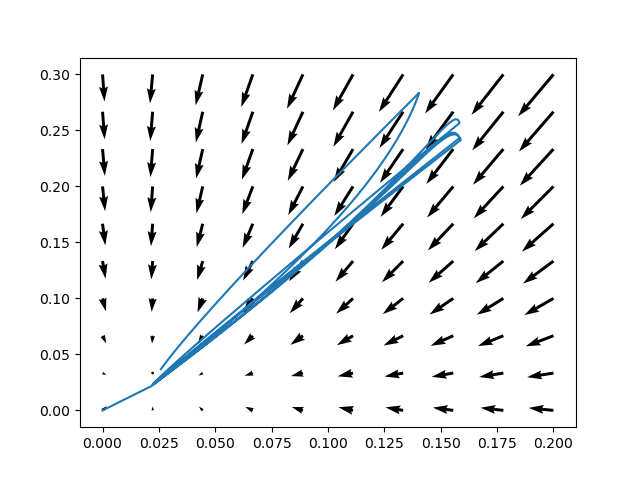

In [20]:
n_X = 10
n_Y = 10
X = np.linspace(0, 0.2, n_X)
Y = np.linspace(0, 0.3, n_Y)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X):
    for x0_idx, x0 in enumerate(Y):
        x = np.array([x0, x1, sol.x[2], sol.x[3]])
        dxdt = dxdt_v2(x, w, inj_excite=I)
        U[x0_idx, x1_idx] = dxdt[1]
        V[x0_idx, x1_idx] = dxdt[0]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
# ax.streamplot(X, Y, U, V)
ax.plot(x_negdev_L6[:, 1], x_negdev_L6[:, 0])


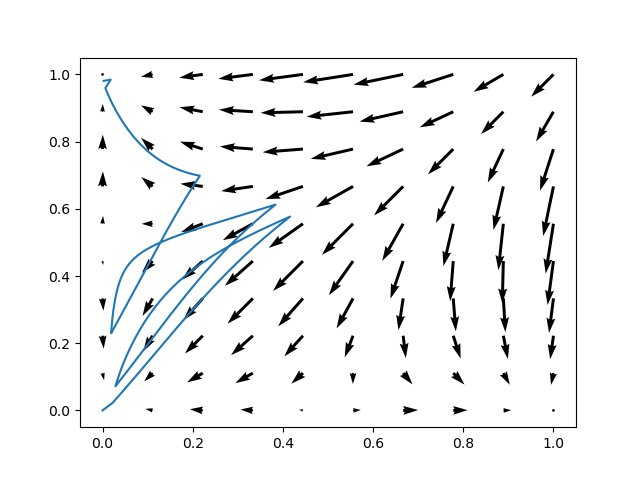

In [18]:
n_X = 10
n_Y = 10
X = np.linspace(0, 1, n_X)
Y = np.linspace(0, 1, n_Y)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X):
    for x0_idx, x0 in enumerate(Y):
        x = np.array([x0, x1, sol.x[2], sol.x[3]])
        dxdt = dxdt_v2(x, w, inj_excite=I)
        U[x0_idx, x1_idx] = dxdt[1]
        V[x0_idx, x1_idx] = dxdt[0]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
# ax.streamplot(X, Y, U, V)
ax.plot(x_negdev_noL6[:, 1], x_negdev_noL6[:, 0])